# Intro

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

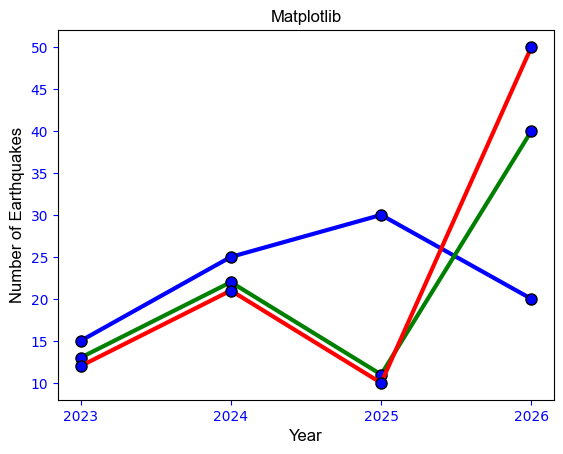

In [41]:
x = np.array([2023,2024,2025,2026])
y1 = np.array([15,25,30,20])
y2 = np.array([13,22,11,40])
y3 = np.array([12,21,10,50])

plt.title("Matplotlib",fontsize=12,family="arial")

plt.xlabel("Year",fontsize=12,family="arial")
plt.ylabel("Number of Earthquakes",fontsize=12,family="arial")


line_style = dict(marker='o',markersize=8,markerfacecolor='blue',markeredgecolor='black',linewidth=3)

plt.tick_params(axis="both",colors='blue')

plt.plot(x,y1,color='blue',**line_style)
plt.plot(x,y2,color='green',**line_style)
plt.plot(x,y3,color='red',**line_style)

plt.xticks(x)

plt.show()

# Grid

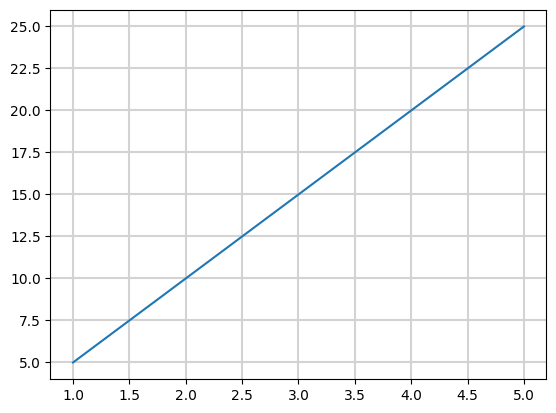

In [46]:
x = [1,2,3,4,5]
y = [5,10,15,20,25]

plt.grid(linewidth=1.5,color="lightgray")

plt.plot(x,y)
plt.show()